# Команда "Гей клуб «Мини-Макс»" <br>
Вилов Максим <br>
Денисов Денис <br>
Козулин Илья<br>
Сенников Андрей<br>

µ 01717 

Графическая интерпретация модели выглядит следующим образом: 

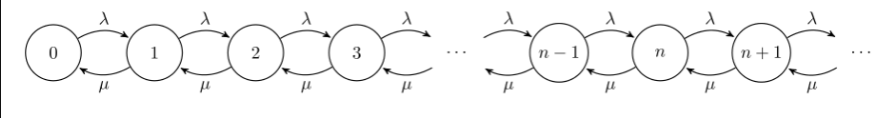

В рамках рассматриваемой задачи смоделируем простейшую модель массового обслуживания M/M/1/∞.

М/M показывают, что система имеет входной пуассоновский поток заявок (момент появления нового клиента в очереди распределен с параметром λ), и время обслуживания экспоненциально распределено с коэффициентом μ ссответственно.

Третье значение "1" показывает, что наша модель имеет ровно один обработчик требований.

Последнее значение "∞"  означает, что на вход подается бесконечный поток.

Эти показатели в модели фиксированы и в течение лабораторной работы изменяться не будут. В качестве экспериментов будем изменять λ и µ соответсвенно.

Каждое следующее состояние будет означать изменение количество запросов в очереди, т.е. приход нового запроса или окончание обслживание одного из старых.

$$\Omega = \left\{ \omega = (\omega_1, \omega_2, ..., \omega_n, ...): \omega_i \in \left\{ 0, 1, 2, ...\right\} \right\}$$
$$\mathcal{F}=2^\Omega$$
$$P(\omega_{i+1}=k+1 \;|\; \omega_i=k)=\frac{\lambda}{\mu + \lambda}$$
$$P(\omega_{i+1}=k-1 \;|\; \omega_i=k)=\frac{\mu}{\mu + \lambda}$$
$$P(\omega_{i+1}=1 \;|\; \omega_i=0)=1$$
$$$$

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import warnings

from typing import List, Dict

SEED = 42
random.seed(SEED)

In [66]:
class Markovian:
    def __init__(self, lmbda: float, mu: float) -> None:
        self.lmbda = lmbda      # входной поток с интенсивностью lambda 
        self.mu = mu            # исходящий поток с интенсивностью mu
        
        self.current_customers = 0
        self.entry_probability = self.lmbda / (self.lmbda + self.mu)
        self.exit_probability = self.mu / (self.lmbda + self.mu)
        self.average_waiting_time = 0
        self.total_waiting_time = 0
        self.average_queue_size = 0
        self.total_customers = 0
        self.customers_per_event = []
        self.waiting_time_per_customer = []
        
        self.current_moment = 0
        self.real_queue = []
        
        self.event_types = ["service", "entry"]
        
    def _get_service_time(self) -> float:
        return random.expovariate(self.mu)
    
    def _get_event_type(self) -> str:
        return random.choices(self.event_types, [self.exit_probability, self.entry_probability])[0]
    
    def update_prob(self) -> None:
        if self.current_customers == 0:
            self.entry_probability = 1
            self.exit_probability = 0
        else:
            self.entry_probability = self.lmbda / (self.lmbda + self.mu)
            self.exit_probability = self.mu / (self.lmbda + self.mu)
            
    def event(self) -> None:
        self.update_prob()
        event = self._get_event_type()
        
        if event == "entry":
            self.current_customers += 1
        else:
            self.current_customers -= 1
            service_time = self._get_service_time()
        
        self.customers_per_event.append(self.current_customers)
        
    def run(self, number_of_iterations: int) -> Dict[str, float]:
        metrics = dict()
        
        for _ in range(number_of_iterations):
            self.event()
        
        metrics["Average Queue Size"] = sum(self.customers_per_event) / number_of_iterations
        # TBD: 
        # metrics["Average Waiting Time"] = ...
        
        return metrics

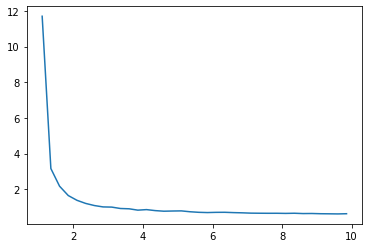

In [67]:
lmda = 1
avg_queue_size = []
mus = []
for mu in np.arange(1.1, 10, 0.25):
    queue = Markovian(lmda, mu)
    avg_queue_size.append(queue.run(10000)["Average Queue Size"])
    mus.append(mu)
plt.plot(mus, avg_queue_size)